Epoch 1/200


C:\Users\mjaha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mjaha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8935 - val_loss: 0.0743 - learning_rate: 0.0010
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0126 - learning_rate: 0.0010
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 10/200


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 4.5152e-04
Advanced MTL FNN Model - Test Loss: 0.00043897610157728195
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


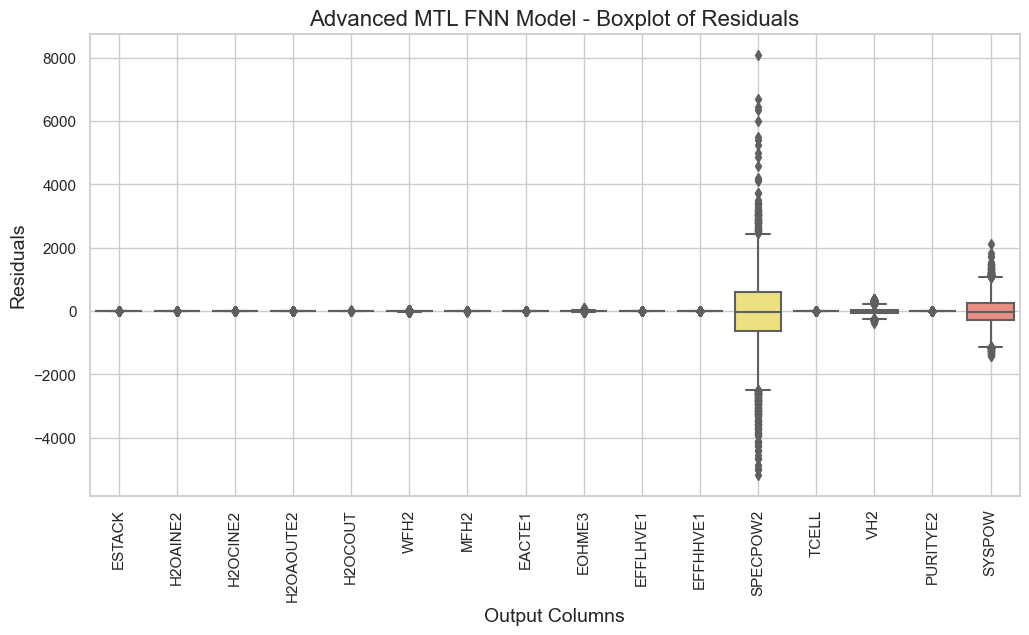

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 4.5152e-04
Advanced MTL FNN Model - Test Loss: 0.00043897610157728195
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


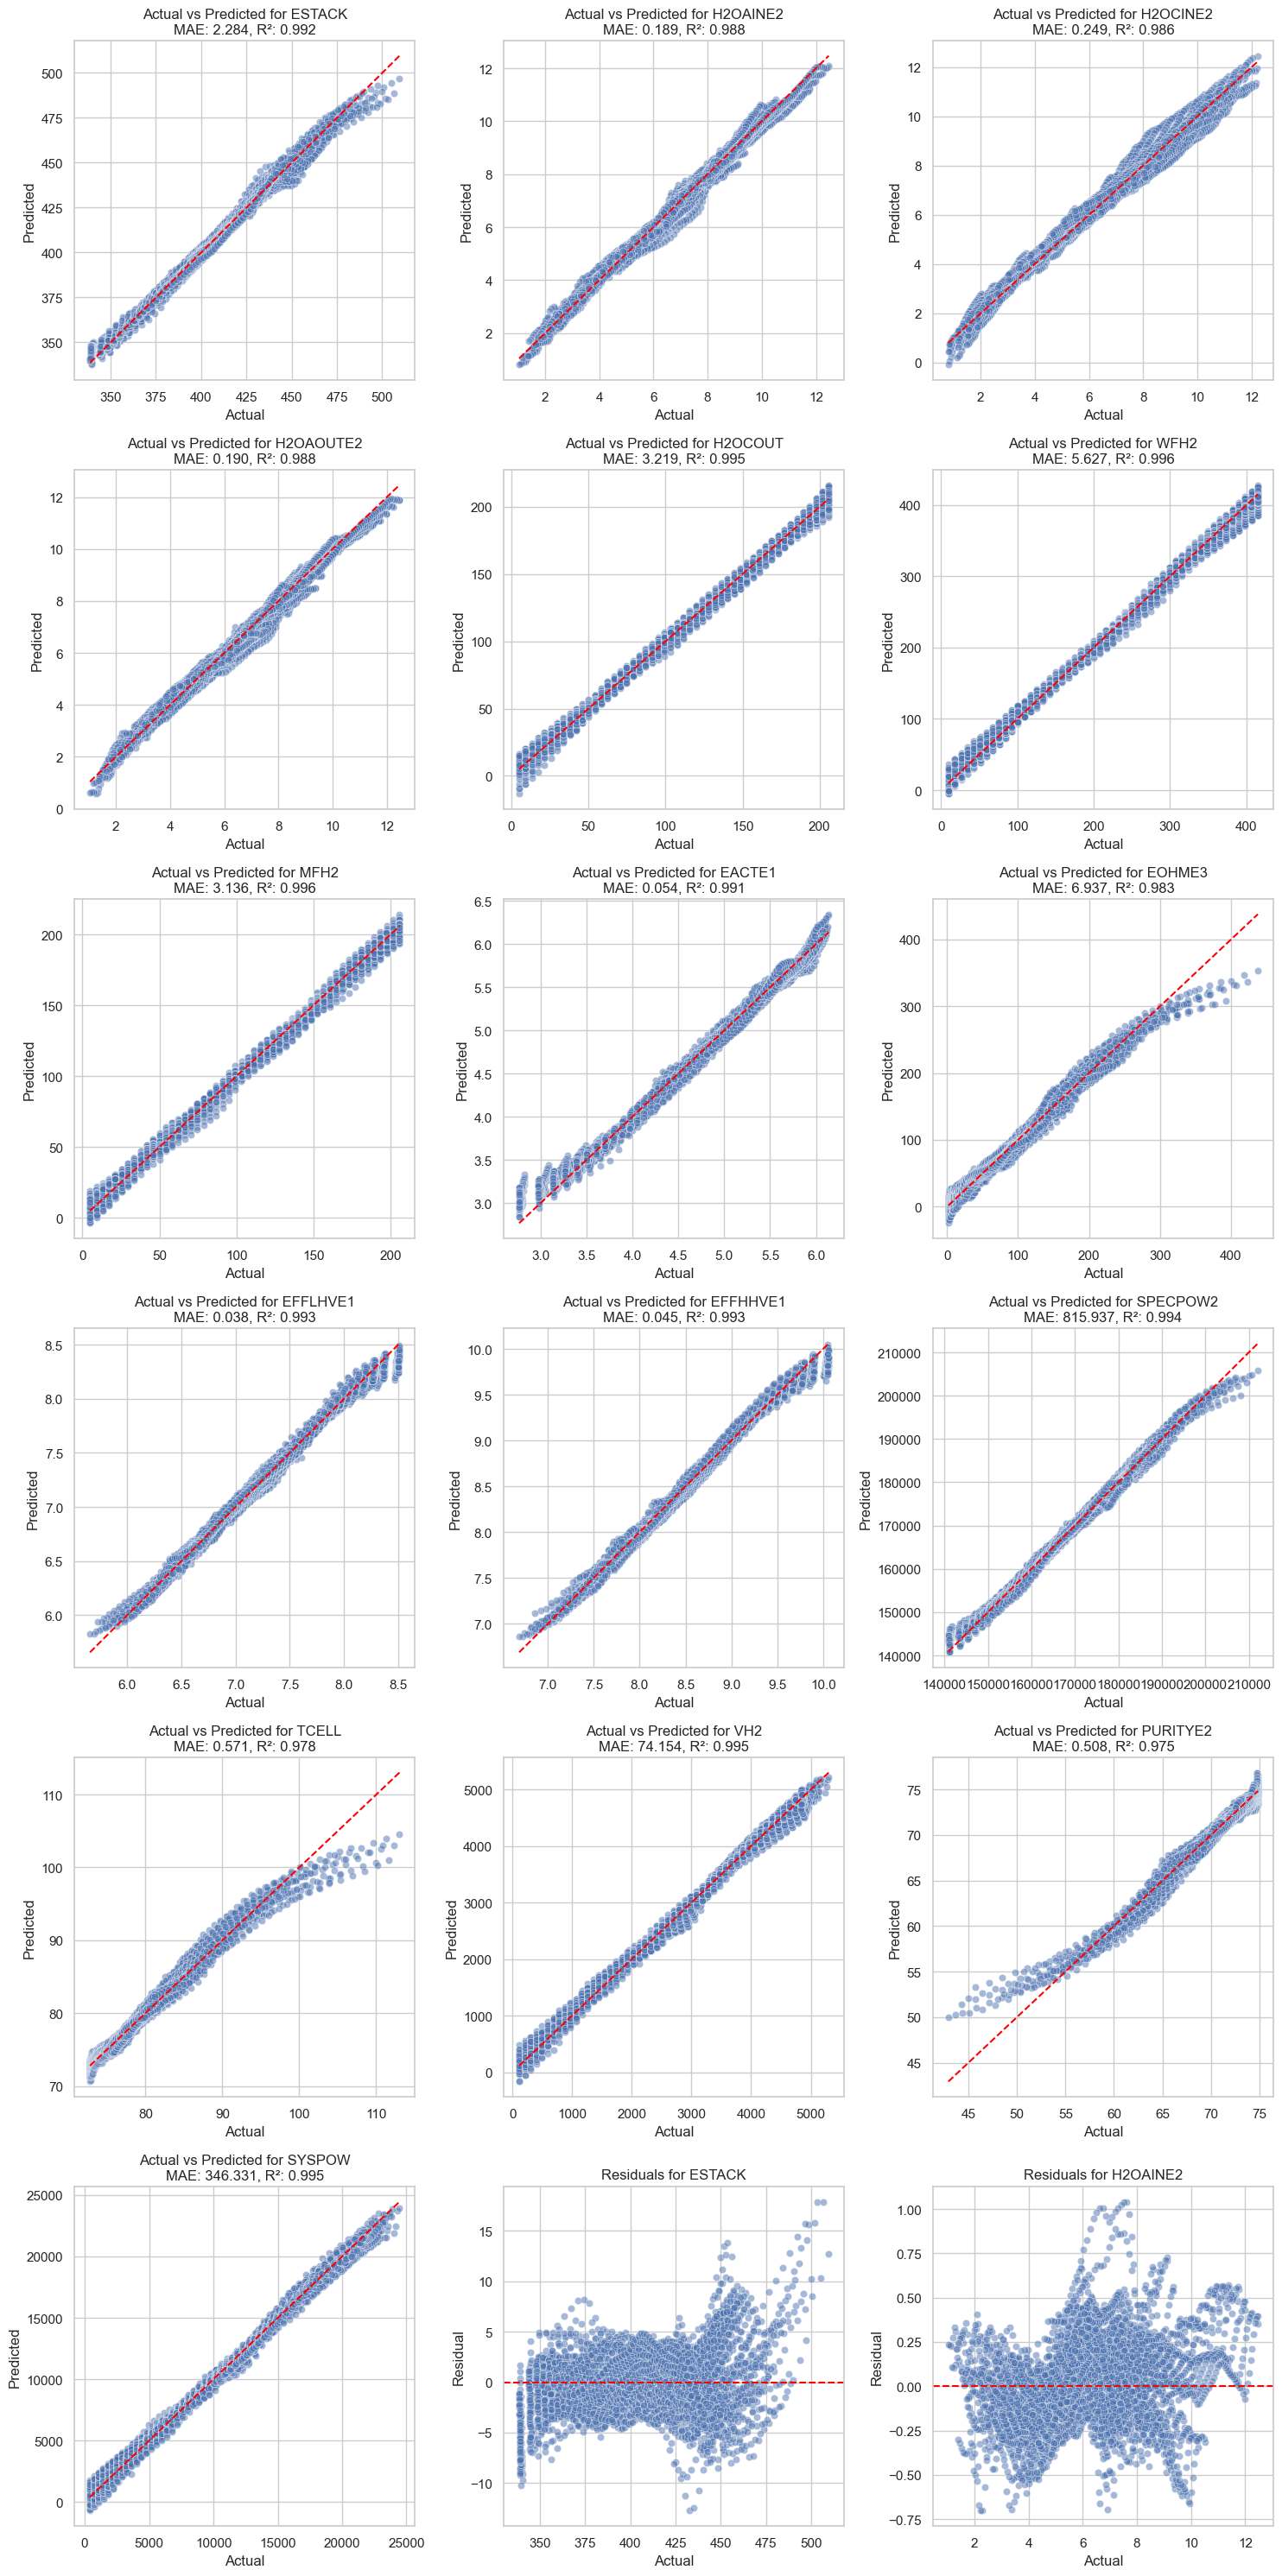

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Set seaborn style 
sns.set(style="whitegrid")

# Load and Prepare Data
data = pd.read_csv('full result clean.csv')
data.columns = data.columns.str.strip()

# Input and output columns
input_columns = ['V1', 'V2', 'V3E4']
output_columns = ['ESTACK', 'H2OAINE2', 'H2OCINE2', 'H2OAOUTE2',
                  'H2OCOUT', 'WFH2', 'MFH2', 'EACTE1', 'EOHME3', 'EFFLHVE1', 'EFFHHVE1',
                  'SPECPOW2', 'TCELL', 'VH2', 'PURITYE2', 'SYSPOW']

# Check for missing columns
missing_input_cols = [col for col in input_columns if col not in data.columns]
missing_output_cols = [col for col in output_columns if col not in data.columns]
if missing_input_cols:
    raise KeyError(f"Input columns missing from the dataset: {missing_input_cols}")
if (missing_output_cols):
    raise KeyError(f"Output columns missing from the dataset: {missing_output_cols}")

X = data[input_columns].values
y = data[output_columns].values

# Normalize Data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define Advanced MTL FNN Model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Dense(len(output_columns)))

# Compile and Train with Callbacks
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
callbacks = [
    ReduceLROnPlateau(factor=0.1, patience=5), 
    EarlyStopping(patience=10, restore_best_weights=True)
]
history = model.fit(X_train, y_train, epochs=200, batch_size=32, 
                    validation_split=0.2, callbacks=callbacks)

# Model name
model_name = "Advanced MTL FNN Model"

# Step 4: Plotting

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title(f'{model_name} - Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"{model_name} - Test Loss:", test_loss)

# Predicting and inverse scaling for real values if needed
y_pred = model.predict(X_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Calculate residuals
residuals = y - y_pred_rescaled

# Plot actual vs predicted for all outputs with 45-degree line
num_output_cols = len(output_columns)
num_plots_per_row = 4  # Number of plots to show per row
num_rows = int(np.ceil(num_output_cols / num_plots_per_row))

plt.figure(figsize=(18, 5 * num_rows))
plt.suptitle(f'{model_name} - Actual vs Predicted', fontsize=20)

for i, col in enumerate(output_columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    sns.scatterplot(x=y[:, i], y=y_pred_rescaled[:, i], alpha=0.5)
    plt.plot([min(y[:, i]), max(y[:, i])], [min(y[:, i]), max(y[:, i])], color='red', linestyle='--')  # 45-degree line
    plt.title(f'Actual vs Predicted for {col}', fontsize=12)
    plt.xlabel('Actual', fontsize=10)
    plt.ylabel('Predicted', fontsize=10)
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot scatter plot of residuals for all outputs
plt.figure(figsize=(18, 5 * num_rows))
plt.suptitle(f'{model_name} - Residuals', fontsize=20)

for i, col in enumerate(output_columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    sns.scatterplot(x=y[:, i], y=residuals[:, i], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals for {col}', fontsize=12)
    plt.xlabel('Actual', fontsize=10)
    plt.ylabel('Residuals', fontsize=10)
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals.flatten(), bins=30, kde=True, color='blue')
plt.title(f'{model_name} - Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Plot boxplot of residuals for all outputs
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(residuals, columns=output_columns), palette="Set3")
plt.title(f'{model_name} - Boxplot of Residuals', fontsize=16)
plt.xlabel('Output Columns', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Evaluate Model
test_loss = model.evaluate(X_test, y_test)
print(f"{model_name} - Test Loss:", test_loss)

# Predicting and inverse scaling for real values 
y_pred = model.predict(X_scaled)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# Calculate Metrics (Mean Absolute Error and R-squared)
mae_scores = mean_absolute_error(y, y_pred_rescaled, multioutput='raw_values')
r2_scores = r2_score(y, y_pred_rescaled, multioutput='raw_values')

# Improved Plotting with Dynamic Figure Size and More Information
num_output_cols = len(output_columns)
num_plots_per_row = 3
num_rows = int(np.ceil(num_output_cols / num_plots_per_row))

# Calculate the total number of subplots needed and the actual number available
total_plots_needed = num_output_cols * 3
total_subplots = num_rows * num_plots_per_row

# Create a figure with enough subplots (or at least as many as possible)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot only for the available subplots
for i, col in enumerate(output_columns):
    # Subplot 1: Actual vs. Predicted
    sns.scatterplot(x=y[:, i], y=y_pred_rescaled[:, i], alpha=0.5, ax=axes[i])
    axes[i].plot([min(y[:, i]), max(y[:, i])], [min(y[:, i]), max(y[:, i])], color='red', linestyle='--')  
    axes[i].set_title(f'Actual vs Predicted for {col}\nMAE: {mae_scores[i]:.3f}, R²: {r2_scores[i]:.3f}')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')

    # Subplot 2: Residuals (only if there's space)
    if num_output_cols + i < total_subplots:
        sns.scatterplot(x=y[:, i], y=y[:, i] - y_pred_rescaled[:, i], alpha=0.5, ax=axes[num_output_cols + i]) 
        axes[num_output_cols + i].axhline(0, color='red', linestyle='--')
        axes[num_output_cols + i].set_title(f'Residuals for {col}')
        axes[num_output_cols + i].set_xlabel('Actual')
        axes[num_output_cols + i].set_ylabel('Residual')
    
    # Subplot 3: Histogram of Residuals (only if there's space)
    if 2 * num_output_cols + i < total_subplots: 
        sns.histplot(y[:, i] - y_pred_rescaled[:, i], bins=20, kde=True, ax=axes[2 * num_output_cols + i])
        axes[2 * num_output_cols + i].set_title(f'Residuals Distribution for {col}')
        axes[2 * num_output_cols + i].set_xlabel('Residual')
        axes[2 * num_output_cols + i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(total_plots_needed, len(axes)):
    fig.delaxes(axes[j])
    
# Save the figure as a JPEG image
fig.savefig('model_evaluation_plots.jpg', dpi=300) # Adjust dpi for resolution

plt.tight_layout()
plt.show()
